In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import math
import numpy as np
import pandas as pd

In [2]:
query_device = 'ios'
map_device = 'ios'
group = 'bad'
file_path = f"estimate_pose/{query_device}_query/{map_device}_map/{group}_pairs.txt"

df = pd.read_csv(file_path, sep=", ", engine='python')
df

# query_img  \
0    ios_2023-07-12_20.46.14_000/images/4835202104.jpg   
1    ios_2023-07-12_20.46.14_000/images/4835202104.jpg   
2    ios_2023-07-12_20.46.14_000/images/4835202104.jpg   
3    ios_2023-07-12_20.46.14_000/images/4835202104.jpg   
4    ios_2023-07-12_20.46.14_000/images/4846797061.jpg   
..                                                 ...   
511  ios_2024-07-03_13.54.46_000/images/52324339526...   
512  ios_2024-07-03_13.54.46_000/images/52325938830...   
513  ios_2024-07-03_13.54.46_000/images/52325938830...   
514  ios_2024-07-03_13.54.46_000/images/52325938830...   
515  ios_2024-07-03_13.54.46_000/images/52325938830...   

                                               map_img      R_err  
0    ios_2024-07-03_13.49.13_000/images/51881791994...   6.719690  
1    ios_2024-07-03_13.52.58_000/images/52133695775...   5.119467  
2    ios_2024-07-03_13.52.58_000/images/52138910174...   5.052769  
3     ios_2023-07-14_09.23.15_000/images/600312702.jpg   8.189843  
4    ios_2023-07-12_20.51.17_000/images/5110393779.jpg   6.708008  
..                                                 ...        ...  
511  ios_2023-07-12_20.54.50_000/images/5435078252.jpg  18.862057  
512  ios_2024-07-04_09.51.03_000/images/67157619910...   7.558804  
513  ios_2024-07-04_09.51.03_000/images/67070591051...   5.220656  
514  ios_2024-07-03_13.52.58_000/images/52150505131...  11.918001  
515  ios_2024-07-03_13.52.58_000/images/52151104870...  19.487577  

[516 rows x 3 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   # query_img  516 non-null    object 
 1   map_img      516 non-null    object 
 2   R_err        516 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.2+ KB


In [4]:
df['R_err'].describe()

count    516.000000
mean      48.051494
std       48.315702
min        5.052769
25%       10.314683
50%       25.642131
75%       70.708280
max      177.548482
Name: R_err, dtype: float64

In [5]:
def show_image_pair(capture, query_device, map_device, group, sample=0.1):
    file_path = f"estimate_pose/{query_device}_query/{map_device}_map/{group}_pairs.txt"
    with open(file_path, 'r') as file:
        lines = file.readlines()
        sample = math.ceil(sample * len(lines))
        lines = np.random.choice(lines, sample, replace=False)

    for line in lines:
        if line.startswith("#"): continue
        query_img_path, map_img_path, error = line.strip().split(', ')
        error = float(error)

        query_img_path = f"{capture}/ARCHE_D2/sessions/{query_device}_query/raw_data/{query_img_path}"
        map_img_path = f"{capture}/ARCHE_D2/sessions/{map_device}_map/raw_data/{map_img_path}"
        
        query_img = Image.open(query_img_path)
        map_img = Image.open(map_img_path)

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        axs[0].imshow(query_img)
        axs[0].set_title(f"Query <{query_device}> Image")
        axs[0].axis('off')

        axs[1].imshow(map_img)
        axs[1].set_title(f"Map <{map_device}> Image")
        axs[1].axis('off')

        fig.text(0.5, 1, f'Error: {error:.4f}', ha='center', va='center', fontsize=12, color='red', weight='bold')

        # Show the plot
        plt.tight_layout()
        plt.show()

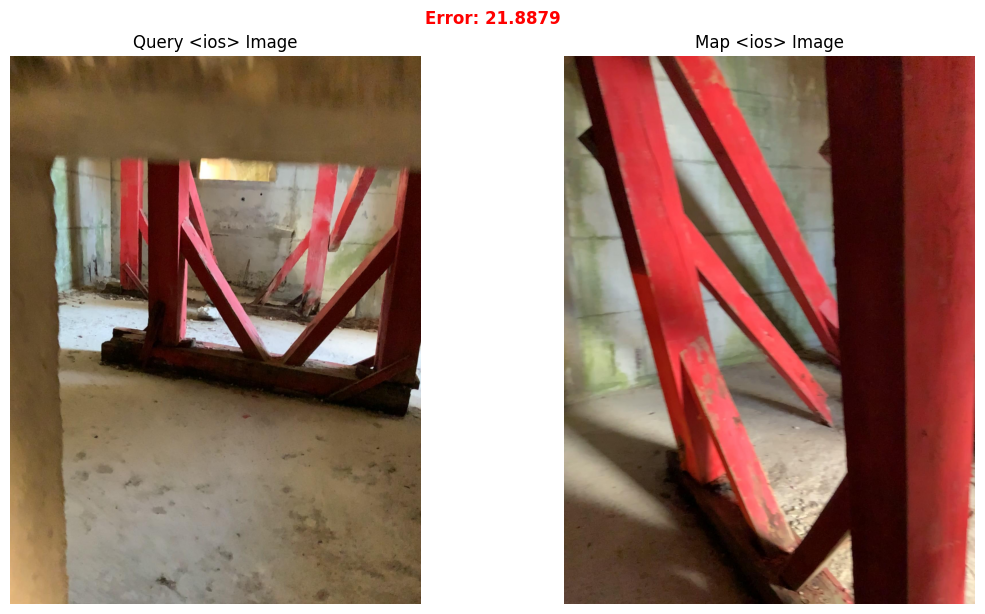

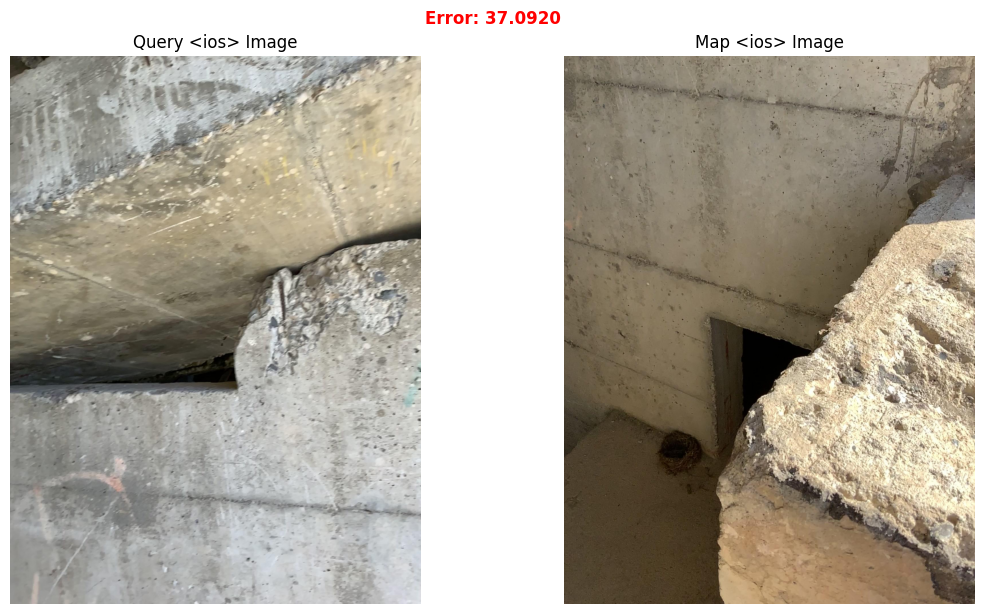

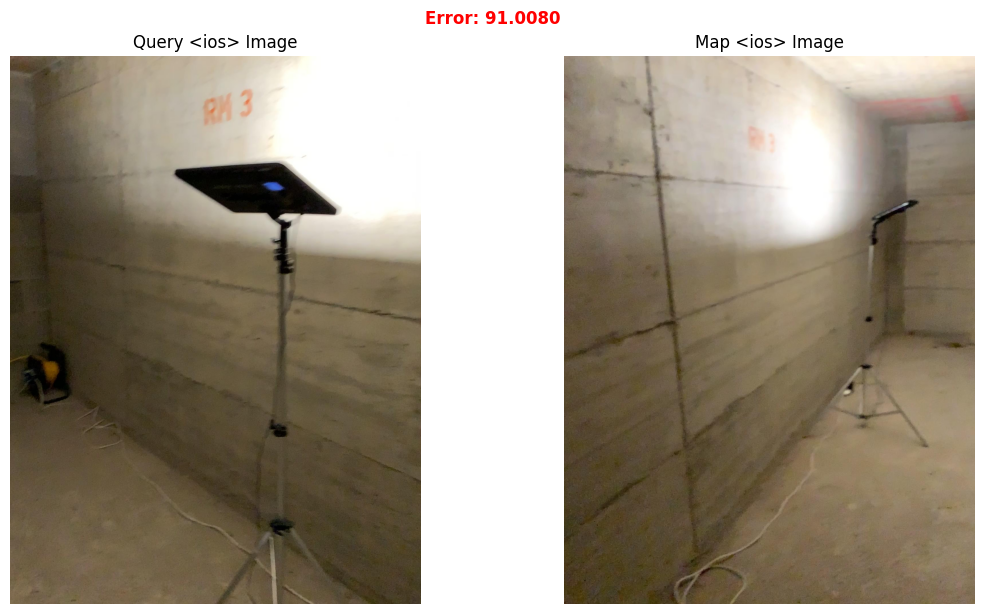

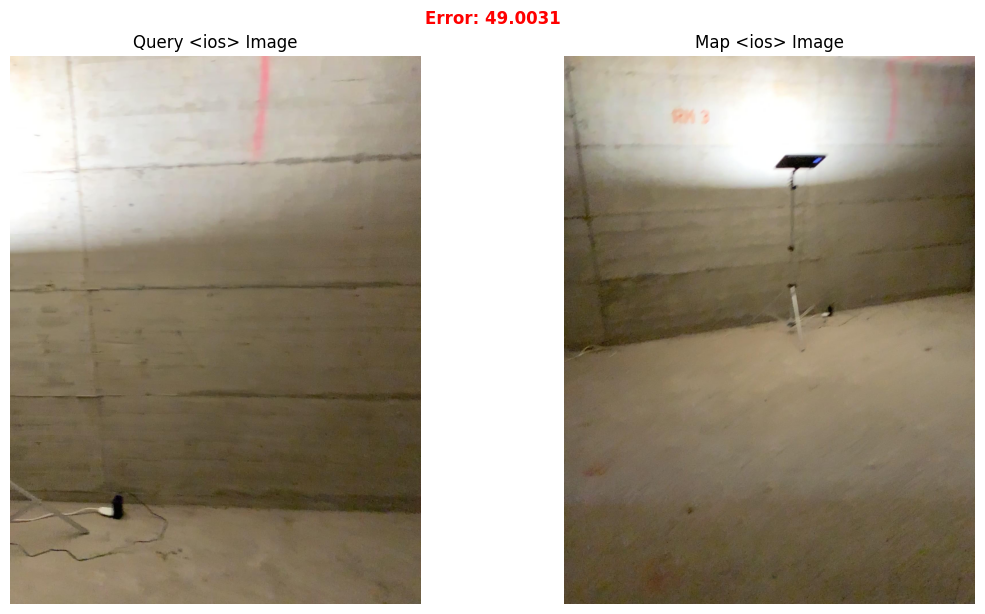

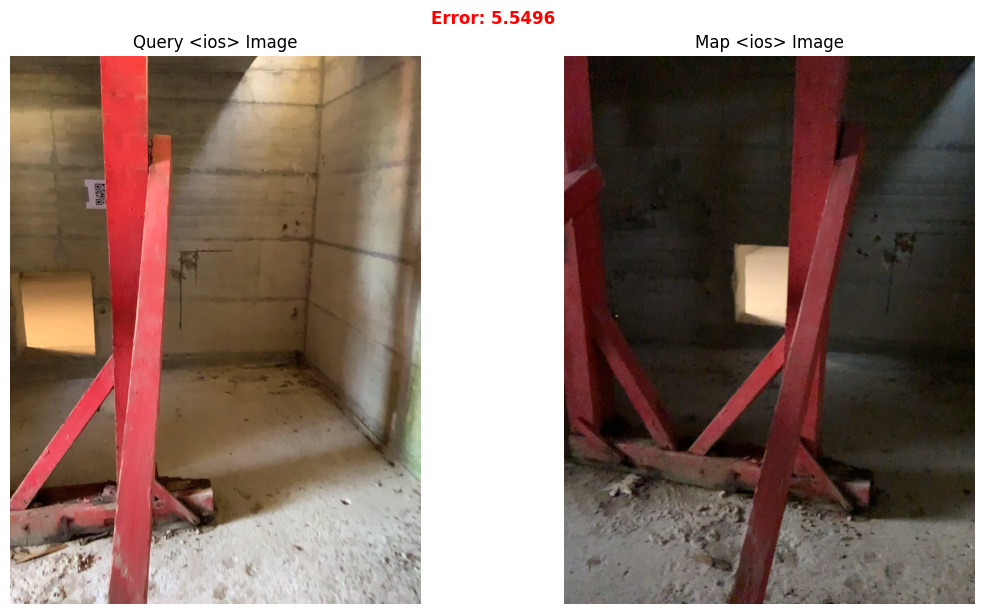

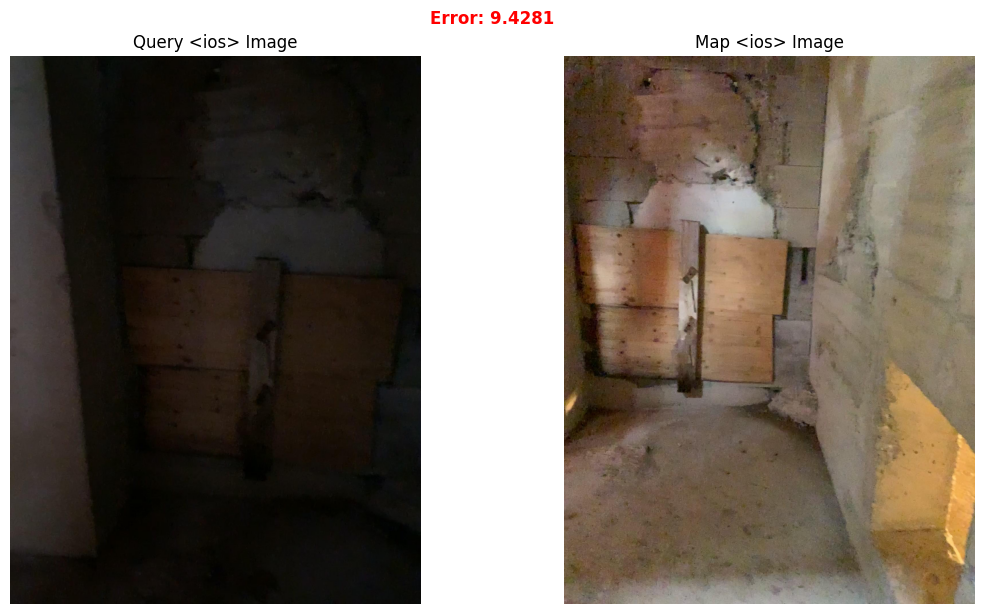

In [6]:
capture = "/home/long/Workspace/crocodl-benchmark/capture"

query_device = 'ios'
map_device = 'ios'
group = 'bad'
sample = 0.01

show_image_pair(capture, query_device, map_device, group, sample)